# Data Visualization 

* Barplot

In [25]:
import seaborn as sns
diamonds=sns.load_dataset('diamonds')
df=diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [28]:
df["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [29]:
df["color"].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [30]:
from pandas.api.types import CategoricalDtype

In [31]:
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: object

In [32]:
df.cut=df.cut.astype(CategoricalDtype(ordered=True))

In [34]:
df.dtypes

carat       float64
cut        category
color        object
clarity      object
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [35]:
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): [Fair < Good < Ideal < Premium < Very Good]

In [36]:
cut_categories=["Fair","Good","Very Good","Premium","Ideal"]

In [37]:
df.cut=df.cut.astype(CategoricalDtype(categories=cut_categories,ordered=True))

In [38]:
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): [Fair < Good < Very Good < Premium < Ideal]

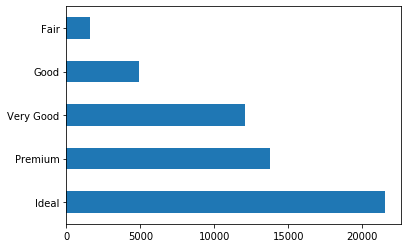

In [40]:
df["cut"].value_counts().plot.barh();

Text(0.5, 1.0, 'Frequency of Variable of CUT')

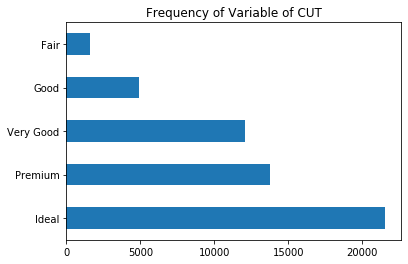

In [41]:
(df["cut"]
 .value_counts()
 .plot.barh()
 .set_title("Frequency of Variable of CUT"))

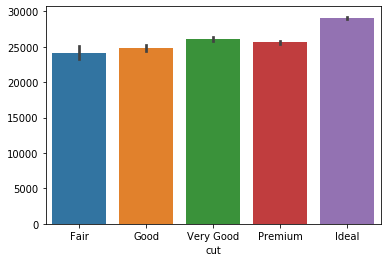

In [42]:
sns.barplot(x="cut",y=df.cut.index,data=df);

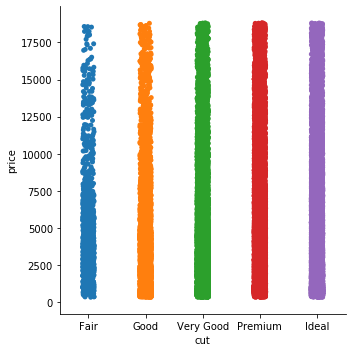

In [43]:
sns.catplot(x="cut",y="price",data=df);

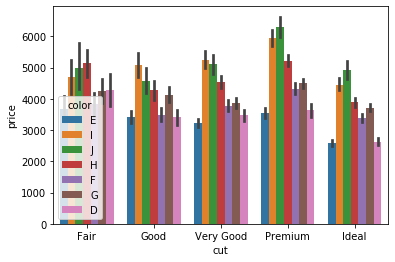

In [44]:
sns.barplot(x="cut",y="price",hue="color",data=df);

* HISTOGRAM and DISTPLOT

In [46]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


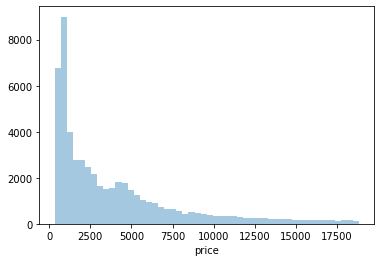

In [48]:
sns.distplot(df.price,kde=False);

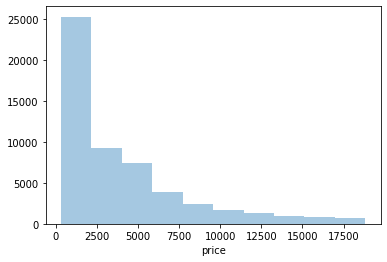

In [50]:
sns.distplot(df.price,bins=10,kde=False);

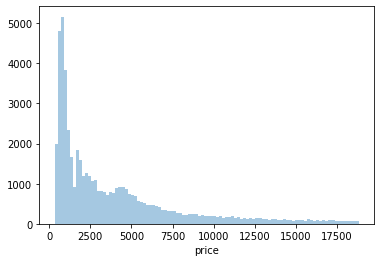

In [51]:
sns.distplot(df.price,bins=100,kde=False);

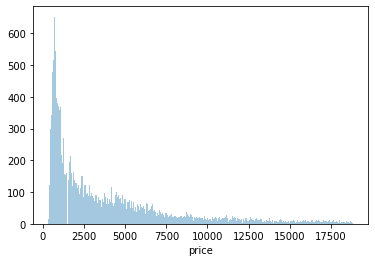

In [53]:
sns.distplot(df.price,bins=1000,kde=False);

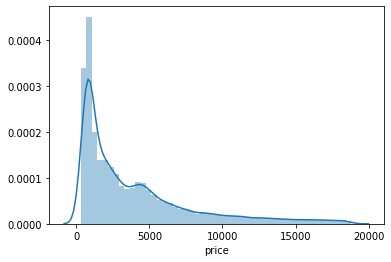

In [54]:
sns.distplot(df.price);

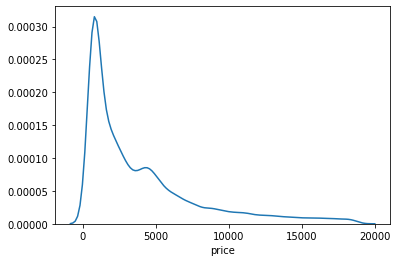

In [55]:
sns.distplot(df.price,hist=False);

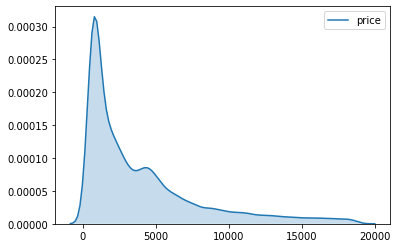

In [56]:
sns.kdeplot(df.price,shade=True);

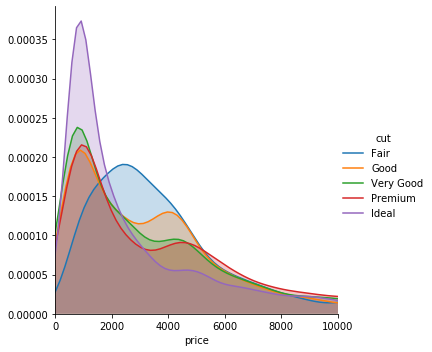

In [57]:
(sns
.FacetGrid(df,
               hue="cut",
               height=5,
               xlim=(0, 10000))
.map(sns.kdeplot,"price",shade=True)
.add_legend()
);

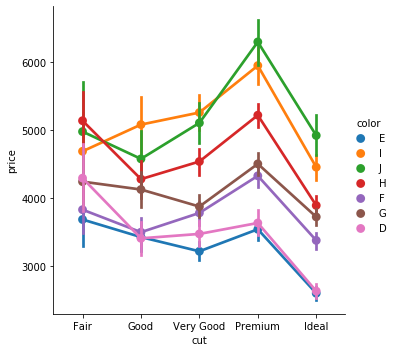

In [58]:
sns.catplot(x="cut",y="price",hue="color",kind="point",data=df);

* BOXPLOT

In [2]:
import seaborn as sns
tips=sns.load_dataset("tips")
df1=tips.copy()
df1.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [5]:
df1["sex"].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [7]:
df1["smoker"].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [9]:
df1["day"].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [10]:
df1["time"].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

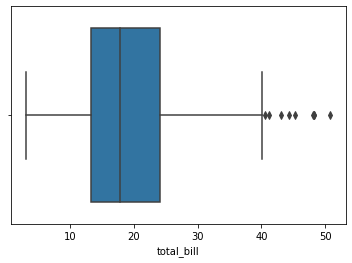

In [12]:
sns.boxplot(x=df1.total_bill);

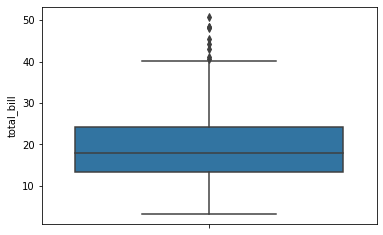

In [14]:
sns.boxplot(x=df1.total_bill,orient="v")

In [16]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


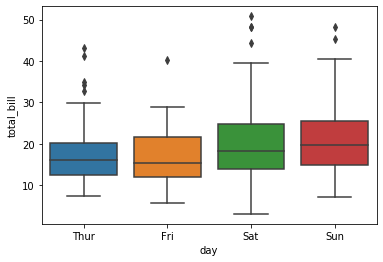

In [17]:
sns.boxplot(x="day",y="total_bill",data=df1);

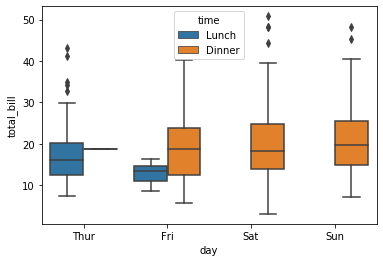

In [19]:
sns.boxplot(x="day",y="total_bill", hue= "time",data=df1);

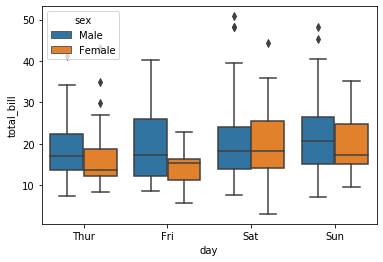

In [20]:
sns.boxplot(x="day",y="total_bill", hue= "sex",data=df1);

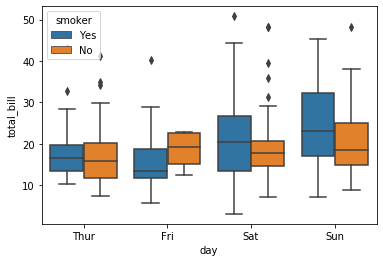

In [21]:
sns.boxplot(x="day",y="total_bill", hue= "smoker",data=df1);

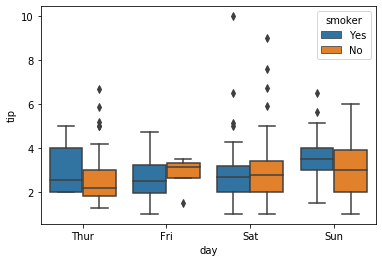

In [22]:
sns.boxplot(x="day",y="tip", hue= "smoker",data=df1);

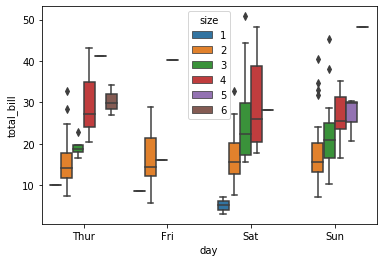

In [23]:
sns.boxplot(x="day",y="total_bill", hue= "size",data=df1);

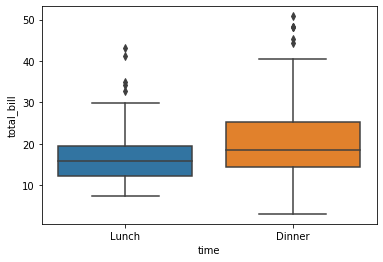

In [24]:
sns.boxplot(x="time",y="total_bill",data=df1);

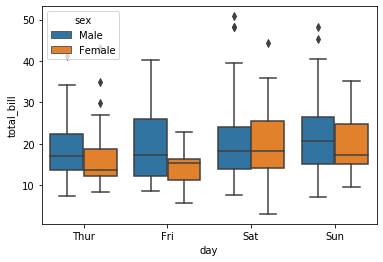

In [25]:
sns.boxplot(x="day",y="total_bill",hue="sex",data=df1);

* Violin Graph

In [26]:
df1.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


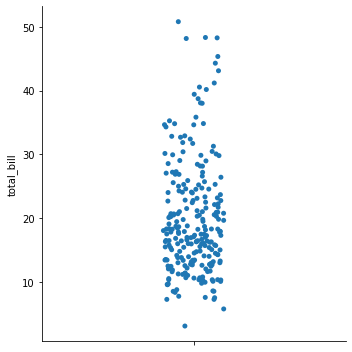

In [27]:
sns.catplot(y="total_bill",data=df1);

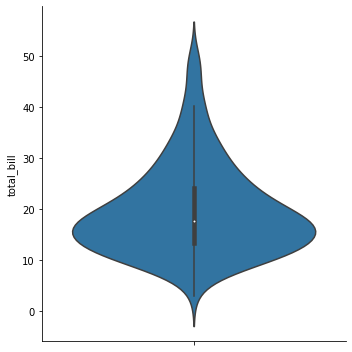

In [28]:
sns.catplot(y="total_bill",kind="violin",data=df1);

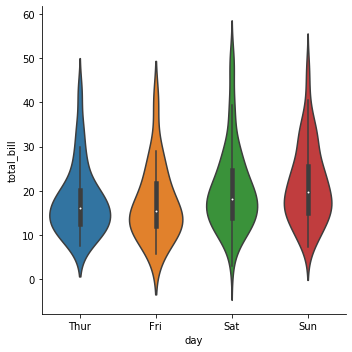

In [29]:
sns.catplot(x="day",y="total_bill",kind="violin",data=df1);

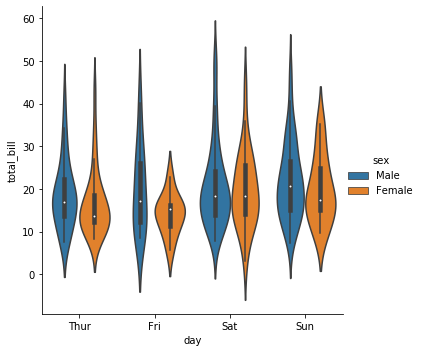

In [30]:
sns.catplot(x="day",y="total_bill", hue="sex",kind="violin",data=df1);

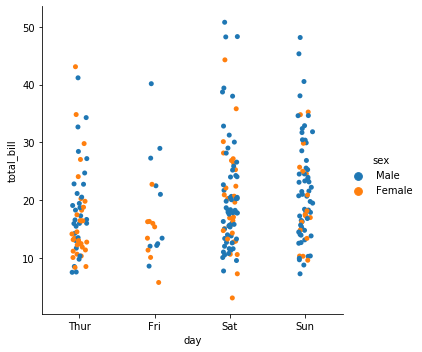

In [31]:
sns.catplot(x="day",y="total_bill", hue="sex",data=df1);

* SCATTERPLOT

In [32]:
df1.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


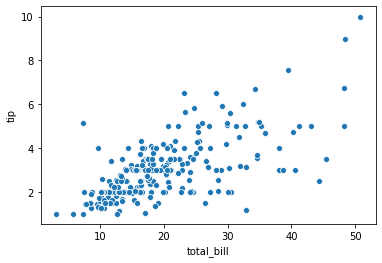

In [33]:
sns.scatterplot(x="total_bill",y="tip",data=df1);

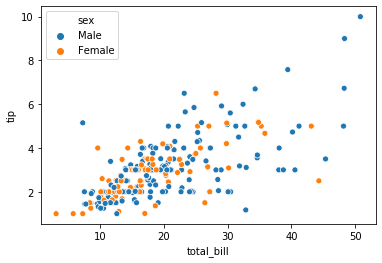

In [34]:
sns.scatterplot(x="total_bill",y="tip", hue="sex",data=df1);

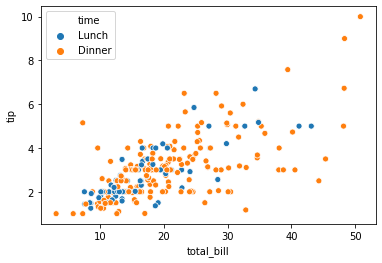

In [35]:
sns.scatterplot(x="total_bill",y="tip",hue="time",data=df1);

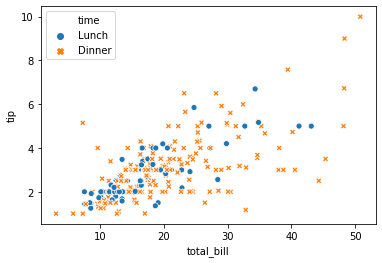

In [37]:
sns.scatterplot(x="total_bill",y="tip",hue="time",style="time",data=df1);

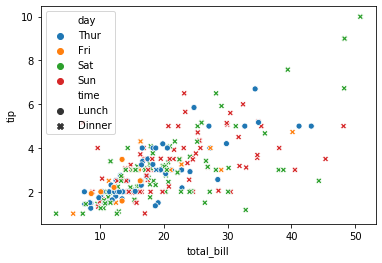

In [38]:
sns.scatterplot(x="total_bill",y="tip",hue="day",style="time",data=df1);

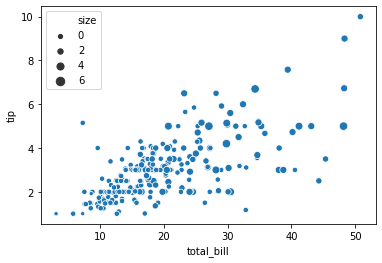

In [39]:
sns.scatterplot(x="total_bill",y="tip",size="size",data=df1);

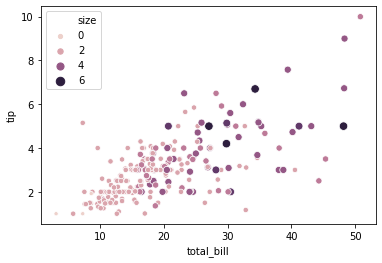

In [40]:
sns.scatterplot(x="total_bill",y="tip",hue="size",size="size",data=df1);

* Linear Model Plot

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

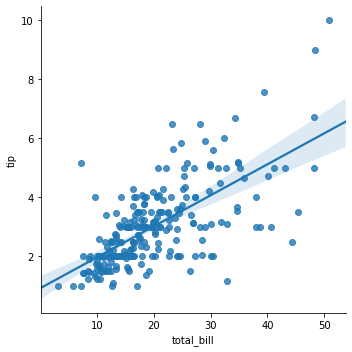

In [42]:
sns.lmplot(x="total_bill",y="tip",data=df1); 

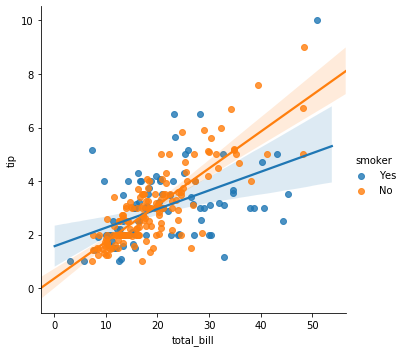

In [43]:
sns.lmplot(x="total_bill",y="tip", hue="smoker",data=df1);

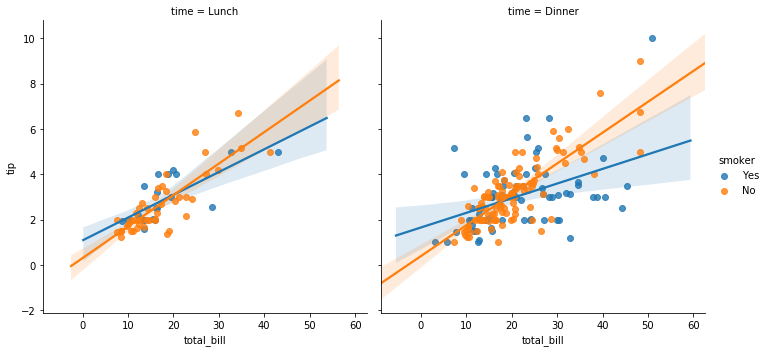

In [44]:
sns.lmplot(x="total_bill",y="tip", hue="smoker", col="time",data=df1);

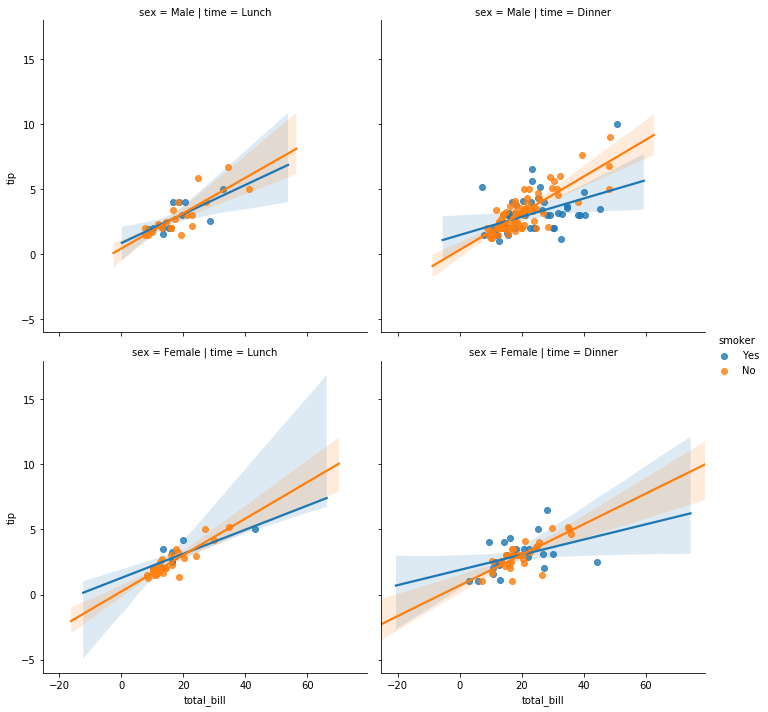

In [46]:
sns.lmplot(x="total_bill",y="tip", hue="smoker", col="time",row="sex",data=df1);

* Scatter Plot

In [52]:
import seaborn as sns
iris=sns.load_dataset("iris")
df2=iris.copy()
df2.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [53]:
df2.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [54]:
df2.shape

(150, 5)

In [55]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


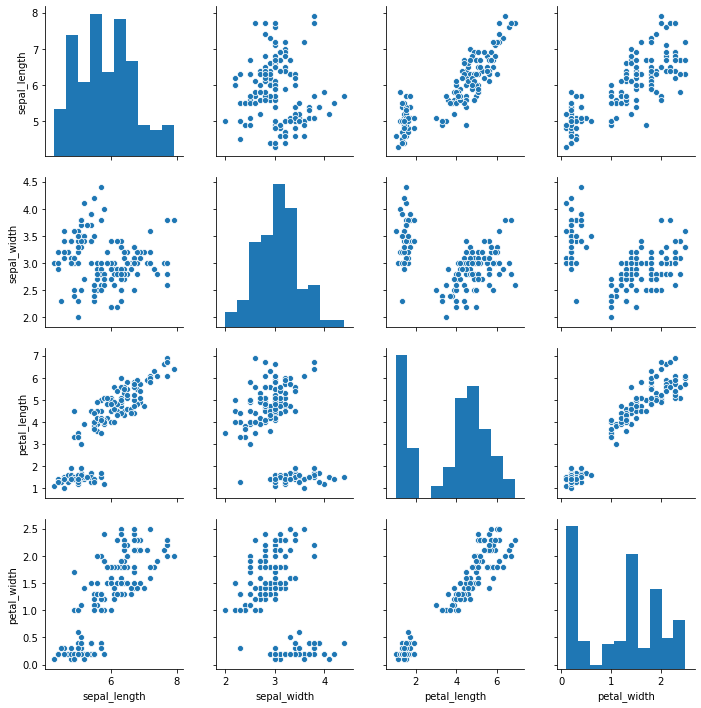

In [56]:
sns.pairplot(df2);

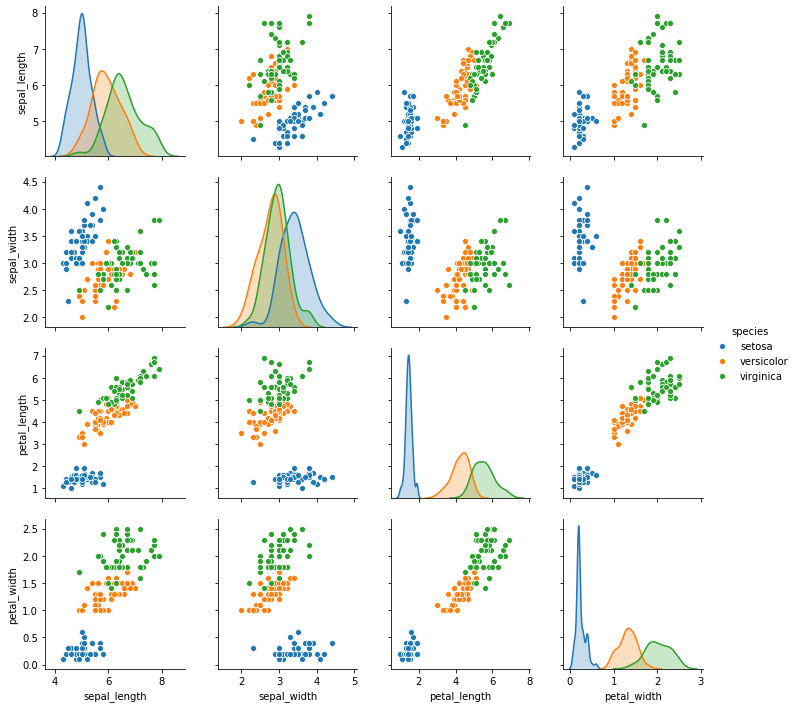

In [57]:
sns.pairplot(df2,hue="species");

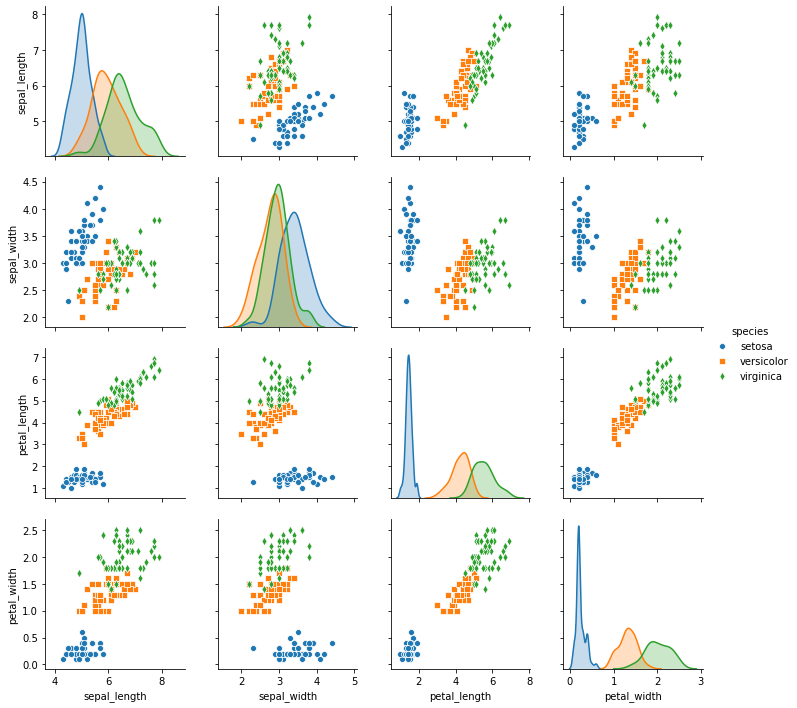

In [58]:
sns.pairplot(df2,hue="species",markers=["o","s","d"]);

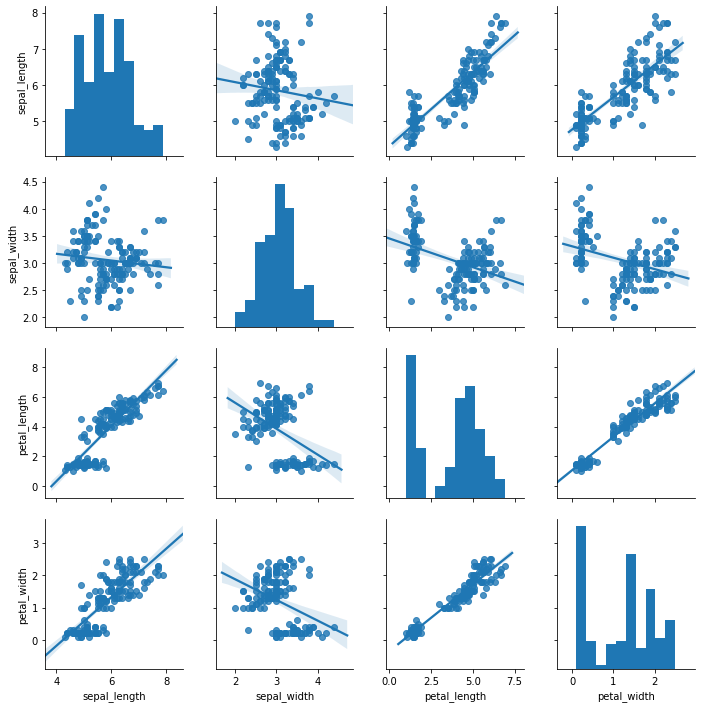

In [60]:
sns.pairplot(df2,kind="reg");

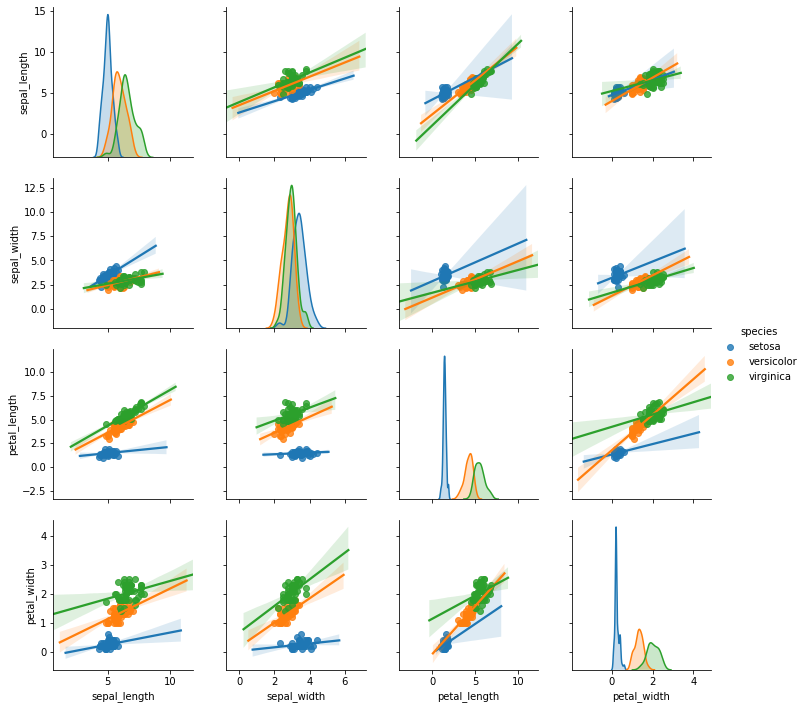

In [61]:
sns.pairplot(df2,kind="reg",hue="species");

* Heat Map

In [62]:
import seaborn as sns
flights=sns.load_dataset("flights")
df3=flights.copy()
df3.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [65]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
year          144 non-null int64
month         144 non-null category
passengers    144 non-null int64
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [66]:
df3["passengers"].describe()

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: passengers, dtype: float64

In [67]:
df3=df3.pivot("month","year","passengers")

In [68]:
df3

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


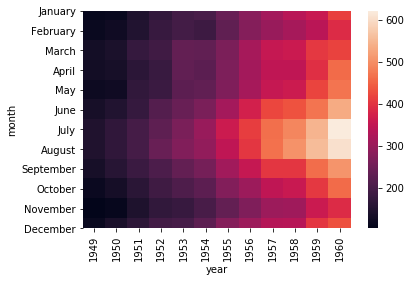

In [69]:
sns.heatmap(df3);

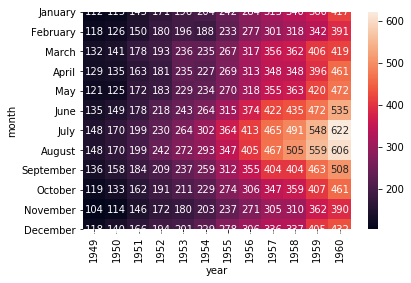

In [70]:
sns.heatmap(df3,annot=True,fmt="d");# degerleri kutularin icine yazdirdik

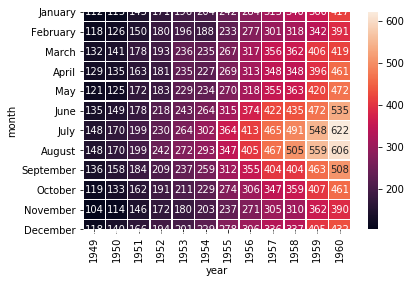

In [71]:
sns.heatmap(df3,annot=True,fmt="d",linewidths=0.5);

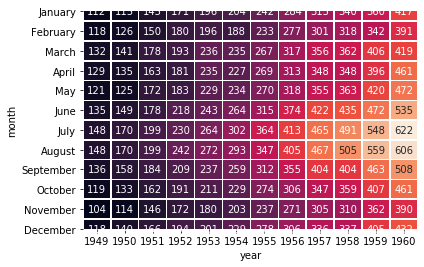

In [72]:
sns.heatmap(df3,annot=True,fmt="d",linewidths=0.5,cbar=False);

* Line Graph

In [73]:
import seaborn as sns
fmri=sns.load_dataset("fmri")
df4=fmri.copy()
df4.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [76]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 5 columns):
subject      1064 non-null object
timepoint    1064 non-null int64
event        1064 non-null object
region       1064 non-null object
signal       1064 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 41.7+ KB


In [77]:
df4["timepoint"].describe()

count    1064.000000
mean        9.000000
std         5.479801
min         0.000000
25%         4.000000
50%         9.000000
75%        14.000000
max        18.000000
Name: timepoint, dtype: float64

In [79]:
df4["signal"].describe()

count    1064.000000
mean        0.003540
std         0.093930
min        -0.255486
25%        -0.046070
50%        -0.013653
75%         0.024293
max         0.564985
Name: signal, dtype: float64

In [81]:
df4.groupby("timepoint")["signal"].describe().T

timepoint,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,-0.016662,-0.025002,-0.012873,0.034446,0.098194,0.137725,0.127515,0.075660,0.013420,-0.032041,-0.053685,-0.058194,-0.052526,-0.043532,-0.033660,-0.025880,-0.022414,-0.021368,-0.021867
std,0.028326,0.030641,0.035440,0.058260,0.092838,0.123353,0.137332,0.129704,0.104216,0.072728,0.053148,0.053828,0.056991,0.053598,0.045983,0.039092,0.035035,0.034797,0.036322
min,-0.064454,-0.082174,-0.110565,-0.089708,-0.046347,-0.017946,-0.054405,-0.108222,-0.181241,-0.152929,-0.176453,-0.238474,-0.255486,-0.224351,-0.169312,-0.134828,-0.131641,-0.121574,-0.103513
25%,-0.039169,-0.046299,-0.034944,-0.001157,0.030912,0.042762,0.022409,-0.016252,-0.049453,-0.075693,-0.078893,-0.093127,-0.090391,-0.069285,-0.055110,-0.050536,-0.041122,-0.042946,-0.046781
50%,-0.018382,-0.024533,-0.013183,0.028430,0.070166,0.096535,0.068850,0.032486,-0.012834,-0.038496,-0.052906,-0.045699,-0.042294,-0.031612,-0.022165,-0.018207,-0.020777,-0.017070,-0.020225
75%,0.003539,-0.005388,0.009318,0.061840,0.144911,0.211638,0.218919,0.144781,0.030396,0.008717,-0.015302,-0.022522,-0.016239,-0.012958,-0.006797,0.000486,-0.001380,-0.000026,-0.002821
max,0.074399,0.063558,0.077277,0.185581,0.346775,0.476055,0.564985,0.494787,0.337143,0.221716,0.089231,0.030528,0.055766,0.059510,0.050133,0.047102,0.057105,0.073757,0.090520


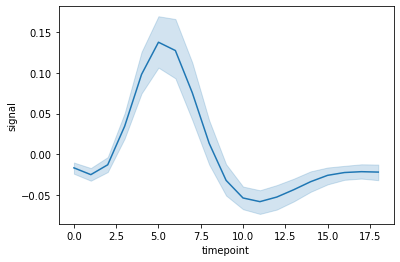

In [83]:
sns.lineplot(x="timepoint",y="signal",data=df4);

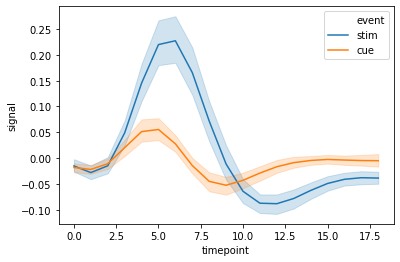

In [84]:
sns.lineplot(x="timepoint",y="signal",hue="event",data=df4);

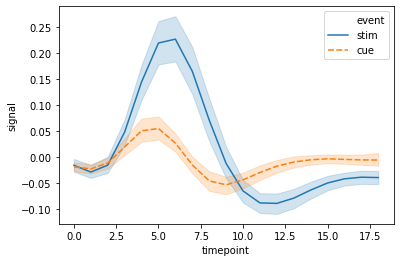

In [85]:
sns.lineplot(x="timepoint",y="signal",hue="event",style="event",data=df4);

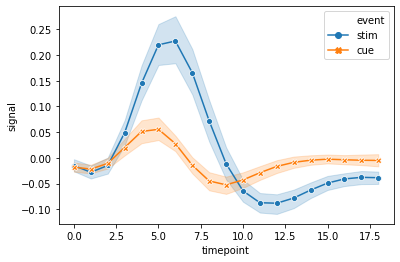

In [87]:
sns.lineplot(x="timepoint",
             y="signal",
             hue="event",
             style="event",
             markers=True, 
             dashes=False, 
             data=df4);

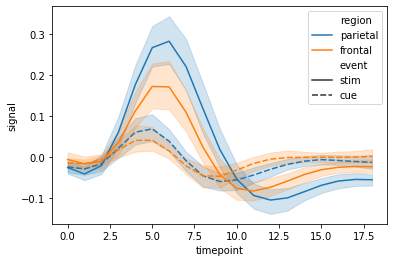

In [89]:
sns.lineplot(x="timepoint",
             y="signal",
             hue="region",
             style="event",
            
             data=df4);

* Time Series Graph

In [90]:
!pip install pandas_datareader
import pandas_datareader as pr

In [91]:
df5=pr.get_data_yahoo("AAPL",start="2016-01-01",end="2019-08-25")

In [92]:
df5.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,105.370003,102.000000,102.610001,105.349998,67649400.0,98.213585
2016-01-05,105.849998,102.410004,105.750000,102.709999,55791000.0,95.752419
2016-01-06,102.370003,99.870003,100.559998,100.699997,68457400.0,93.878586
2016-01-07,100.129997,96.430000,98.680000,96.449997,81094400.0,89.916473
2016-01-08,99.110001,96.760002,98.550003,96.959999,70798000.0,90.391907


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [94]:
close_value=df5["Close"]

In [95]:
close_value.head()

Date
2016-01-04    105.349998
2016-01-05    102.709999
2016-01-06    100.699997
2016-01-07     96.449997
2016-01-08     96.959999
Name: Close, dtype: float64

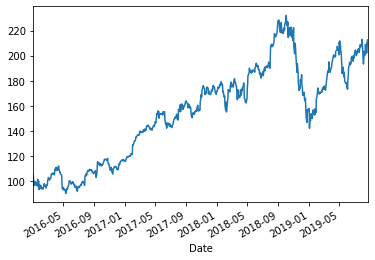

In [96]:
close_value.plot();